In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from astropy import units as u
from astropy import constants as c

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.pbh import PBHAccretionInjection

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../matplotlibrc')

In [2]:
PBHAccretionInjection?

Init signature: PBHAccretionInjection(model, m_PBH, f_PBH)
Docstring:     
Primordial Black Hole (PBH) accretion injection object. See parent class for details.

Args:
    m_PBH (float): PBH mass in [M_sun].
    f_PBH (float): PBH fraction of DM.
File:           ~/dm21cm/DM21cm/dm21cm/injections/pbh.py
Type:           type
Subclasses:     

In [7]:
inj_s = [
    PBHAccretionInjection('PRc23', m_PBH=100, f_PBH=1),
    PBHAccretionInjection('PRc23R', m_PBH=100, f_PBH=1),
    PBHAccretionInjection('BHLl2', m_PBH=100, f_PBH=1),
]

In [8]:
z_s = np.linspace(4, 100, 100)

unity = (1 * u.eV/u.s/u.cm**3 / c.c**2).to(u.M_sun/u.yr/u.Mpc**3)

cf_halo_power_s = []
cf_cosmo_power_s = []
cf_total_power_s = []
for inj in inj_s:
    cf_halo_power_s.append(np.array([inj.inj_halo_power(z) / (1+z)**3 for z in z_s]) * unity.value)
    cf_cosmo_power_s.append(np.array([inj.inj_cosmo_power(z) / (1+z)**3 for z in z_s]) * unity.value)
    cf_total_power_s.append(cf_halo_power_s + cf_cosmo_power_s)

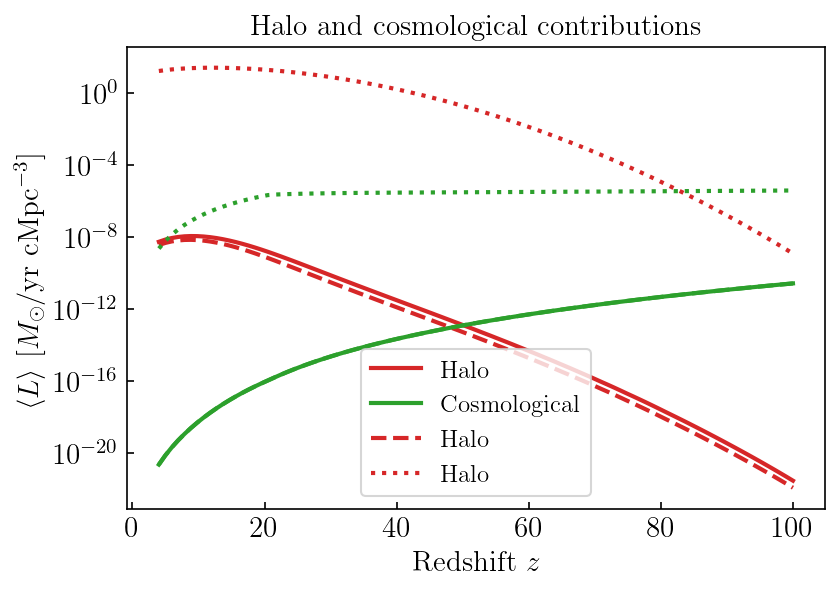

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs

ls_s = ['-', '--', ':']

for i in range(len(inj_s)):
    ax.plot(z_s, cf_halo_power_s[i], label='Halo', ls=ls_s[i], color='C0')
    ax.plot(z_s, cf_cosmo_power_s[i], label=('Cosmological' if i==0 else None), ls=ls_s[i], color='C1')
    # ax.plot(z_s, cf_total_power_s[i], label='Total', ls=':', color='k')
ax.set(yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot$/yr cMpc$^{-3}$]', title=r'Halo and cosmological contributions')
ax.legend()

# fig.savefig('pbhacc-L-z.pdf', bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

ax = axs
ax.plot(z_s, cf_halo_power_s * unity.value, label='Halo')
ax.plot(z_s, cf_cosmo_power_s * unity.value, label='Cosmological')
ax.plot(z_s, cf_total_power_s * unity.value, label='Total')
ax.set(yscale='log')
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\langle L\rangle$ [$M_\odot$/yr cMpc$^{-3}$]', title=r'Halo and cosmological contributions')
ax.legend()

# fig.savefig('L_halo_cosmo.pdf', bbox_inches='tight')